EDA Notebook 

In [2]:
import pandas as pd
import os

In [ ]:
# Load the filtered data
data_path = os.path.join('..', 'data', 'columbia_filtered_citibike.csv')
df = pd.read_csv(data_path, parse_dates=['started_at', 'ended_at'])

print(f"Loaded DataFrame shape: {df.shape}")
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_17928\2636247212.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, parse_dates=['started_at', 'ended_at'])


Loaded DataFrame shape: (529908, 13)
Total rows: 529,908
Total columns: 13


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [5]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DF041079291BCB57,classic_bike,2024-01-01 00:05:39.030,2024-01-01 00:29:03.147,W 116 St & Amsterdam Ave,7692.11,W 116 St & Amsterdam Ave,7692.11,40.806758,-73.960708,40.806758,-73.960708,casual
1,ECC36795CBE519C0,electric_bike,2024-01-01 00:12:53.593,2024-01-01 00:44:46.877,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
2,09AEBF4510BFBE52,electric_bike,2024-01-01 00:13:21.695,2024-01-01 00:45:09.962,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
3,79C06624CD5FDD91,electric_bike,2024-01-01 00:13:27.263,2024-01-01 00:44:31.619,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
4,E4C6AAB102A0EFD9,electric_bike,2024-01-01 00:13:30.398,2024-01-01 00:44:39.129,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
5,A0B8F0DEB214CBBE,electric_bike,2024-01-01 00:13:59.871,2024-01-01 00:44:56.412,W 45 St & 8 Ave,6676.02,W 113 St & Broadway,7713.01,40.759291,-73.988597,40.805973,-73.964928,casual
6,167C2AFE19E42E4D,electric_bike,2024-01-01 00:19:26.001,2024-01-01 00:26:03.535,Lenox Ave & W 126 St,7720.03,W 120 St & Claremont Ave,7745.07,40.808442,-73.945209,40.810949,-73.963400,member
7,3572EA2A5901CFEE,electric_bike,2024-01-01 00:27:28.723,2024-01-01 00:37:54.741,W 120 St & Claremont Ave,7745.07,1 Ave & E 110 St,7522.02,40.810949,-73.963400,40.792327,-73.938300,casual
8,348F0FF5E539F030,electric_bike,2024-01-01 00:38:59.943,2024-01-01 00:42:24.390,Morningside Dr & Amsterdam Ave,7741.04,W 120 St & Claremont Ave,7745.07,40.810285,-73.957365,40.810949,-73.963400,member
9,F14AA5C4F9C739C8,electric_bike,2024-01-01 00:45:18.310,2024-01-01 00:50:53.857,W 106 St & Amsterdam Ave,7634.01,W 120 St & Claremont Ave,7745.07,40.800836,-73.966449,40.810949,-73.963400,member


In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Lets drop columns that are not gonna be used into the analysis

In [7]:
df_feat = df.copy()

# keeping only relevant columns
df_feat = df_feat[[
    "started_at",
    "ended_at",
    "start_station_name",
    "end_station_name"
]]

Split outflow/inflow

In [8]:
outflow_df = df_feat[["start_station_name", "started_at"]].copy()
outflow_df.rename(columns={
    "start_station_name": "station",
    "started_at": "timestamp"
}, inplace=True)
outflow_df["flow_type"] = "outflow"

In [9]:
outflow_df.head(5)

,station,timestamp,flow_type
0,W 116 St & Amsterdam Ave,2024-01-01 00:05:39.030,outflow
1,W 45 St & 8 Ave,2024-01-01 00:12:53.593,outflow
2,W 45 St & 8 Ave,2024-01-01 00:13:21.695,outflow
3,W 45 St & 8 Ave,2024-01-01 00:13:27.263,outflow
4,W 45 St & 8 Ave,2024-01-01 00:13:30.398,outflow


In [10]:
inflow_df = df_feat[["end_station_name", "ended_at"]].copy()
inflow_df.rename(columns={
    "end_station_name": "station",
    "ended_at": "timestamp"
}, inplace=True)
inflow_df["flow_type"] = "inflow"

inflow_df.head(5)

,station,timestamp,flow_type
0,W 116 St & Amsterdam Ave,2024-01-01 00:29:03.147,inflow
1,W 113 St & Broadway,2024-01-01 00:44:46.877,inflow
2,W 113 St & Broadway,2024-01-01 00:45:09.962,inflow
3,W 113 St & Broadway,2024-01-01 00:44:31.619,inflow
4,W 113 St & Broadway,2024-01-01 00:44:39.129,inflow


Lets keep only the 7 stations we care about

In [11]:
columbia_stations = [
    "W 116 St & Amsterdam Ave",
    "W 113 St & Broadway",
    "W 116 St & Broadway",
    "Amsterdam Ave & W 119 St",
    "Broadway & W 122 St",
    "Morningside Dr & Amsterdam Ave",
    "W 120 St & Claremont Ave"
]

In [12]:
outflow_df = outflow_df[outflow_df["station"].isin(columbia_stations)].copy()
inflow_df  = inflow_df[inflow_df["station"].isin(columbia_stations)].copy()

In [13]:
print(len(outflow_df["station"].unique()))
print(len(inflow_df["station"].unique()))

7
7


Lets extract timestamps for aggregation

In [14]:
outflow_df["timestamp"] = pd.to_datetime(outflow_df["timestamp"])
inflow_df["timestamp"]  = pd.to_datetime(inflow_df["timestamp"])

In [15]:
#Extracting corect timestamp to do the groupby functions / we dont care about minutes and secs
for df_event in [outflow_df, inflow_df]:
    df_event["hour"] = df_event["timestamp"].dt.floor("h")

In [16]:
#We dont need the detailed timestamp anymore
outflow_df = outflow_df.drop(columns=["timestamp"])
inflow_df  = inflow_df.drop(columns=["timestamp"])


In [17]:
#Lets aggregate for the same day for each station the number of bikes leaving the station per hour
outflow_hourly = (
    outflow_df
    .groupby(["station", "hour"])
    .size()
    .reset_index(name="outflow")
)

In [18]:
#Same for inflow
inflow_hourly = (
    inflow_df
    .groupby(["station", "hour"])
    .size()
    .reset_index(name="inflow")
)

In [19]:
#Now we need to merge the two dfs, we will use an outer join to keep all the timestamps 
# #that exist in each df
hourly_df = pd.merge(
    outflow_hourly,
    inflow_hourly,
    on=["station", "hour"],
    how="outer"
)

#Then we can fill with 0s the nans because it means that there was no inflow if there was an outflow 
hourly_df["inflow"] = hourly_df["inflow"].fillna(0)
hourly_df["outflow"] = hourly_df["outflow"].fillna(0)

In [20]:
hourly_df.head(5)

,station,hour,outflow,inflow
0,Amsterdam Ave & W 119 St,2024-01-01 19:00:00,0.0,1.0
1,Amsterdam Ave & W 119 St,2024-01-01 23:00:00,1.0,0.0
2,Amsterdam Ave & W 119 St,2024-01-02 10:00:00,1.0,1.0
3,Amsterdam Ave & W 119 St,2024-01-02 14:00:00,0.0,1.0
4,Amsterdam Ave & W 119 St,2024-01-02 19:00:00,1.0,0.0


In [21]:
#Sanity check
stations = hourly_df["station"].unique()
print(stations)

['Amsterdam Ave & W 119 St' 'Broadway & W 122 St'
 'Morningside Dr & Amsterdam Ave' 'W 113 St & Broadway'
 'W 116 St & Amsterdam Ave' 'W 116 St & Broadway'
 'W 120 St & Claremont Ave']


In [22]:
#So for hour timestamps skipped e.g after  2024-01-01 19:00 we go to 23:00 which
# just means that there were no rides in that hour (neither leaving neither parking) so we can fill
#the timeseries with 0s

#Lets build the full timeline of dates
full_hours = pd.date_range(
    start=hourly_df["hour"].min(),
    end=hourly_df["hour"].max(),
    freq="h"
)

#here we create a Cartesian product : (stations, hour)
#We Take: all 7 Columbia stations
# every hour in the timeline
# and generate a row for every combination

full_index = pd.MultiIndex.from_product(
    [stations, full_hours],
    names=["station", "hour"]
)

#Then we Temporarily use (station, hour) as the index
#Align current data with the full_index
#Any missing (station, hour) combo becomes a new row with NaN
#Reset back to normal columns
hourly_df = (
    hourly_df
    .set_index(["station", "hour"])
    .reindex(full_index)
    .reset_index()
)
#
hourly_df["inflow"] = hourly_df["inflow"].fillna(0)
hourly_df["outflow"] = hourly_df["outflow"].fillna(0)

Now lets extract extra features that will help the algorithm decode behavior

In [25]:
# Extract hour of day (0-23)
hourly_df["hour_of_day"] = hourly_df["hour"].dt.hour

# Year
hourly_df["year"] = hourly_df["hour"].dt.year

# Month
hourly_df["month"] = hourly_df["hour"].dt.month

# Weekday (0 = Monday, 6 = Sunday)
hourly_df["weekday"] = hourly_df["hour"].dt.weekday

# Weekend flag
hourly_df["is_weekend"] = hourly_df["weekday"].isin([5, 6]).astype(int)

In [26]:
#Lets also add a holiday flag
import holidays

years_in_data = sorted(hourly_df["year"].unique())
us_holidays = holidays.US(years=years_in_data)

hourly_df["is_holiday"] = hourly_df["hour"].dt.date.map(
    lambda d: d in us_holidays
).astype(int)

In [27]:
#Sanity check
hourly_df[hourly_df["is_holiday"] == 1].sample(3)

,station,hour,outflow,inflow,hour_of_day,year,month,weekday,is_weekend,is_holiday
21964,Broadway & W 122 St,2024-09-02 04:00:00,0.0,3.0,4,2024,9,0,0,1
68410,W 116 St & Amsterdam Ave,2024-06-19 10:00:00,4.0,1.0,10,2024,6,2,0,1
106397,W 120 St & Claremont Ave,2025-02-17 05:00:00,0.0,0.0,5,2025,2,0,0,1


Since we are gonna treat this as a timeseries problem now we are gonna extract lag_features

In [28]:
#Data are already sorted but lets make sure
hourly_df = hourly_df.sort_values(["station", "hour"]).reset_index(drop=True)

We are not gonna use short-term lags since we have decided that we are gonna a next-day forecast, so will use data up to day D to predict day D+1

In [ ]:
# Add simple lag features
#Previous day same hour
hourly_df["inflow_lag_24"] = hourly_df.groupby("station")["inflow"].shift(24) #careful not to shift station to another station effect so we groupby station as well
hourly_df["outflow_lag_24"] = hourly_df.groupby("station")["outflow"].shift(24)

#Previous week same hour
hourly_df["inflow_lag_168"] = hourly_df.groupby("station")["inflow"].shift(168)
hourly_df["outflow_lag_168"] = hourly_df.groupby("station")["outflow"].shift(168)

In [35]:
#Sanity check
hourly_df[hourly_df["station"] == "W 120 St & Claremont Ave"].head(30)

,station,hour,outflow,inflow,hour_of_day,year,month,weekday,is_weekend,is_holiday,inflow_lag_24,outflow_lag_24,inflow_lag_168,outflow_lag_168
96480,W 120 St & Claremont Ave,2024-01-01 00:00:00,1.0,4.0,0,2024,1,0,0,1,NaN,NaN,NaN,NaN
96481,W 120 St & Claremont Ave,2024-01-01 01:00:00,0.0,0.0,1,2024,1,0,0,1,NaN,NaN,NaN,NaN
96482,W 120 St & Claremont Ave,2024-01-01 02:00:00,1.0,0.0,2,2024,1,0,0,1,NaN,NaN,NaN,NaN
96483,W 120 St & Claremont Ave,2024-01-01 03:00:00,0.0,0.0,3,2024,1,0,0,1,NaN,NaN,NaN,NaN
96484,W 120 St & Claremont Ave,2024-01-01 04:00:00,0.0,1.0,4,2024,1,0,0,1,NaN,NaN,NaN,NaN
96485,W 120 St & Claremont Ave,2024-01-01 05:00:00,0.0,0.0,5,2024,1,0,0,1,NaN,NaN,NaN,NaN
96486,W 120 St & Claremont Ave,2024-01-01 06:00:00,0.0,0.0,6,2024,1,0,0,1,NaN,NaN,NaN,NaN
96487,W 120 St & Claremont Ave,2024-01-01 07:00:00,0.0,0.0,7,2024,1,0,0,1,NaN,NaN,NaN,NaN
96488,W 120 St & Claremont Ave,2024-01-01 08:00:00,0.0,0.0,8,2024,1,0,0,1,NaN,NaN,NaN,NaN
96489,W 120 St & Claremont Ave,2024-01-01 09:00:00,1.0,0.0,9,2024,1,0,0,1,NaN,NaN,NaN,NaN


In [36]:
#Now lets drop the nans
hourly_df = hourly_df.dropna().reset_index(drop=True)

In [39]:
#All good so far
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111384 entries, 0 to 111383
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   station          111384 non-null  object        
 1   hour             111384 non-null  datetime64[ns]
 2   outflow          111384 non-null  float64       
 3   inflow           111384 non-null  float64       
 4   hour_of_day      111384 non-null  int32         
 5   year             111384 non-null  int32         
 6   month            111384 non-null  int32         
 7   weekday          111384 non-null  int32         
 8   is_weekend       111384 non-null  int64         
 9   is_holiday       111384 non-null  int64         
 10  inflow_lag_24    111384 non-null  float64       
 11  outflow_lag_24   111384 non-null  float64       
 12  inflow_lag_168   111384 non-null  float64       
 13  outflow_lag_168  111384 non-null  float64       
dtypes: datetime64[ns](1)

Now lets encode the station ID Models don't understand human text.
They need something numerical to differentiate which station each row belongs to.

In [40]:
# Encode station as category → integer
hourly_df["station_id"] = hourly_df["station"].astype("category").cat.codes

In [42]:
#This is our mapping
hourly_df[["station", "station_id"]].drop_duplicates().sort_values("station_id")

,station,station_id
0,Amsterdam Ave & W 119 St,0
15912,Broadway & W 122 St,1
31824,Morningside Dr & Amsterdam Ave,2
47736,W 113 St & Broadway,3
63648,W 116 St & Amsterdam Ave,4
79560,W 116 St & Broadway,5
95472,W 120 St & Claremont Ave,6


In [43]:
hourly_df

,station,hour,outflow,inflow,hour_of_day,year,month,weekday,is_weekend,is_holiday,inflow_lag_24,outflow_lag_24,inflow_lag_168,outflow_lag_168,station_id
0,Amsterdam Ave & W 119 St,2024-01-08 00:00:00,0.0,0.0,0,2024,1,0,0,0,1.0,0.0,0.0,0.0,0
1,Amsterdam Ave & W 119 St,2024-01-08 01:00:00,0.0,0.0,1,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
2,Amsterdam Ave & W 119 St,2024-01-08 02:00:00,0.0,0.0,2,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
3,Amsterdam Ave & W 119 St,2024-01-08 03:00:00,0.0,0.0,3,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
4,Amsterdam Ave & W 119 St,2024-01-08 04:00:00,0.0,0.0,4,2024,1,0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111379,W 120 St & Claremont Ave,2025-10-31 19:00:00,3.0,0.0,19,2025,10,4,0,0,1.0,5.0,0.0,3.0,6
111380,W 120 St & Claremont Ave,2025-10-31 20:00:00,1.0,0.0,20,2025,10,4,0,0,0.0,4.0,1.0,1.0,6
111381,W 120 St & Claremont Ave,2025-10-31 21:00:00,2.0,0.0,21,2025,10,4,0,0,0.0,7.0,0.0,1.0,6
111382,W 120 St & Claremont Ave,2025-10-31 22:00:00,1.0,0.0,22,2025,10,4,0,0,0.0,4.0,0.0,2.0,6


Now lets add our weather data

In [49]:
data_path = os.path.join('..', 'data', 'openmeteo_cu_hourly_2024_01_to_2025_10_from_client.csv')
weather_df = pd.read_csv(data_path)

weather_df.head(10)

,time,temperature_2m,wind_speed_10m,precipitation,snowfall,snow_depth
0,2024-01-01 05:00:00+00:00,2.331,9.021574,0.0,0.0,0.0
1,2024-01-01 06:00:00+00:00,2.931,10.883676,0.0,0.0,0.0
2,2024-01-01 07:00:00+00:00,2.981,10.086427,0.0,0.0,0.0
3,2024-01-01 08:00:00+00:00,2.731,8.089993,0.0,0.0,0.0
4,2024-01-01 09:00:00+00:00,0.531,5.588703,0.0,0.0,0.0
5,2024-01-01 10:00:00+00:00,-0.269,6.489992,0.0,0.0,0.0
6,2024-01-01 11:00:00+00:00,0.981,3.617955,0.0,0.0,0.0
7,2024-01-01 12:00:00+00:00,1.731,4.829907,0.0,0.0,0.0
8,2024-01-01 13:00:00+00:00,2.881,3.893995,0.1,0.0,0.0
9,2024-01-01 14:00:00+00:00,3.281,4.680000,0.0,0.0,0.0


In [ ]:
weather_df["time"] = pd.to_datetime(weather_df["time"], utc=True) #make sure we have correct timezone
weather_df["time"] = weather_df["time"].dt.tz_convert(None)   # remove timezone

,time,temperature_2m,wind_speed_10m,precipitation,snowfall,snow_depth
0,2024-01-01 05:00:00,2.331000,9.021574,0.0,0.0,0.0
1,2024-01-01 06:00:00,2.931000,10.883676,0.0,0.0,0.0
2,2024-01-01 07:00:00,2.981000,10.086427,0.0,0.0,0.0
3,2024-01-01 08:00:00,2.731000,8.089993,0.0,0.0,0.0
4,2024-01-01 09:00:00,0.531000,5.588703,0.0,0.0,0.0
...,...,...,...,...,...,...
16075,2025-11-01 00:00:00,11.631001,22.732082,0.0,0.0,0.0
16076,2025-11-01 01:00:00,11.381001,23.857979,0.0,0.0,0.0
16077,2025-11-01 02:00:00,10.831000,19.875946,0.0,0.0,0.0
16078,2025-11-01 03:00:00,10.281000,18.852798,0.0,0.0,0.0


In [ ]:
weather_df = weather_df.rename(columns={"time": "hour"})

Now we want to know “For every hour in hourly_df, does weather_df contain that hour?”

In [57]:
#We don’t keep the result yet just testing for now
test_merge = hourly_df.merge(
    weather_df,
    on="hour",
    how="left"
)
missing_count = test_merge["temperature_2m"].isna().sum()
missing_count

np.int64(0)

Perfect, so we got all data

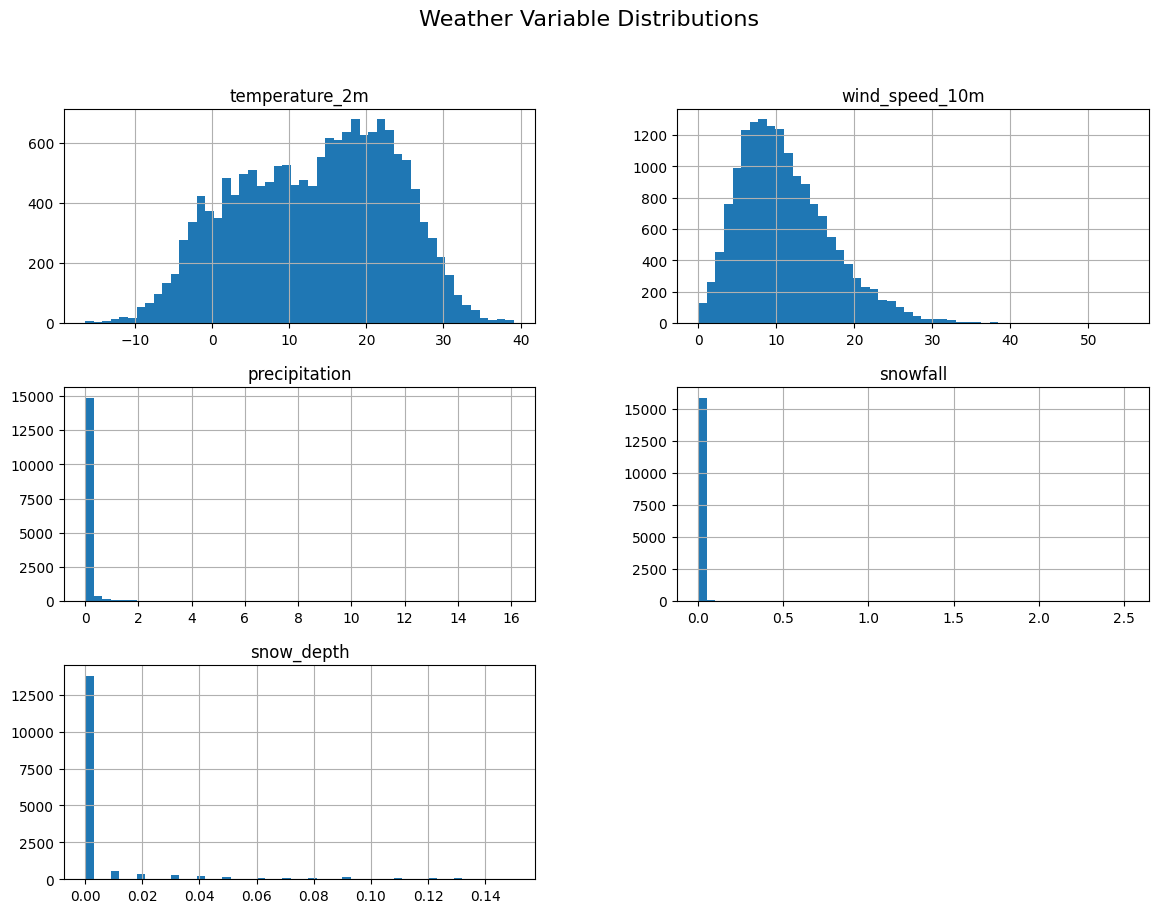

In [59]:
#Lets analyze the weather data a bit
import matplotlib.pyplot as plt

weather_cols = ["temperature_2m", "wind_speed_10m", "precipitation", "snowfall", "snow_depth"]

weather_df[weather_cols].hist(bins=50, figsize=(14, 10))
plt.suptitle("Weather Variable Distributions", fontsize=16)
plt.show()

Our data is ready for model deployment lets save it to our data folder

In [47]:
# Save final dataframe to CSV
hourly_df.to_csv("../data/citibike_columbia_model_ready.csv", index=False)

Our EDA is done here!